## application of knn classification algorithm on 'MNIST' dataset

In [1]:
import cv2
import numpy as np
import gzip

In [2]:
from struct import unpack
import gzip
from numpy import zeros, uint8, float32


def get_labeled_data(imagefile, labelfile):
    """Read input-vector (image) and target class (label, 0-9) and return
       it as list of tuples.
    """
    # Open the images with gzip in read binary mode
    images = gzip.open(imagefile, 'rb')
    labels = gzip.open(labelfile, 'rb')

    # Read the binary data

    # We have to get big endian unsigned int. So we need '>I'

    # Get metadata for images
    images.read(4)  
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4) 
    N = labels.read(4)
    N = unpack('>I', N)[0]

    if number_of_images != N:
        raise Exception('number of labels did not match the number of images')

    # Get the data
    x = zeros((N, rows, cols), dtype=float32)  # Initialize numpy array
    y = zeros((N, 1), dtype=uint8)  # Initialize numpy array
    for i in range(N):
        if i % 1000 == 0:
            print("i: %i" % i)
        for row in range(rows):
            for col in range(cols):
                tmp_pixel = images.read(1)  # Just a single byte
                tmp_pixel = unpack('>B', tmp_pixel)[0]
                x[i][row][col] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]
    return (x, y)

In [3]:
#locations
l1 = 'train-images-idx3-ubyte.gz'
l2=  'train-labels-idx1-ubyte.gz'
l3 = 't10k-images-idx3-ubyte.gz'
l4= 't10k-labels-idx1-ubyte.gz'

In [4]:
train_data, train_labels = get_labeled_data(l1,l2)

i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000
i: 10000
i: 11000
i: 12000
i: 13000
i: 14000
i: 15000
i: 16000
i: 17000
i: 18000
i: 19000
i: 20000
i: 21000
i: 22000
i: 23000
i: 24000
i: 25000
i: 26000
i: 27000
i: 28000
i: 29000
i: 30000
i: 31000
i: 32000
i: 33000
i: 34000
i: 35000
i: 36000
i: 37000
i: 38000
i: 39000
i: 40000
i: 41000
i: 42000
i: 43000
i: 44000
i: 45000
i: 46000
i: 47000
i: 48000
i: 49000
i: 50000
i: 51000
i: 52000
i: 53000
i: 54000
i: 55000
i: 56000
i: 57000
i: 58000
i: 59000


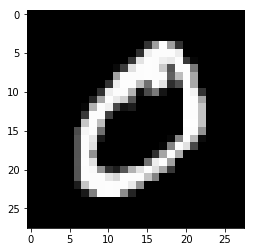

In [81]:
#sample plot
import matplotlib.pyplot as plt
img_sample = train_data[1]
from pylab import imshow
imshow(img_sample, cmap= 'gray')

In [6]:
test_data, test_labels = get_labeled_data(l3,l4)

i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000


In [7]:
temp = []
for i in range(len(train_labels)):
    temp.append(train_labels[i][0])
train_labels_ = np.array(temp)

In [8]:
#reshaping
temp2 = []
val = []
for i in range(len(train_data)):
    val = train_data[i].reshape((1,784))
    temp2.append(val)
train_data_ = np.array(temp2)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [10]:
#reshaping
train_data_.shape
train_data_ = train_data_.reshape(60000,784)

In [11]:
#shape
train_labels_.shape, train_data_.shape

((60000,), (60000, 784))

In [30]:
#classifier 
model = KNeighborsClassifier(n_neighbors= 5, metric= 'euclidean')
model.fit(train_data_, train_labels_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
test_data.shape, test_labels.shape

((10000, 28, 28), (10000, 1))

In [14]:
test_data_ = test_data.reshape(10000,784)
temp3 = []
for i in range(len(test_labels)):
    temp3.append(test_labels[i][0])
test_labels_ = np.array(temp3)

In [33]:
#prediction
y_test = model.predict(test_data_)

In [35]:
from sklearn import metrics
print(metrics.accuracy_score(test_labels_, y_test))
print(metrics.classification_report(test_labels_, y_test))
print(metrics.confusion_matrix(test_labels_, y_test))

0.9688
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       980
          1       0.95      1.00      0.98      1135
          2       0.98      0.96      0.97      1032
          3       0.96      0.97      0.97      1010
          4       0.98      0.96      0.97       982
          5       0.97      0.97      0.97       892
          6       0.98      0.99      0.98       958
          7       0.96      0.96      0.96      1028
          8       0.99      0.94      0.96       974
          9       0.96      0.95      0.95      1009

avg / total       0.97      0.97      0.97     10000

[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945

In [82]:
# correct prediction sum
correct = (y_test == test_labels_)
correct.sum()

9688

In [79]:
def plot_images(images, cls_true, cls_pred):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i], cmap='binary')
        xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

In [78]:
def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = test_data[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = y_test[incorrect]

    # Get the true classes for those images.
    cls_true = test_labels_[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

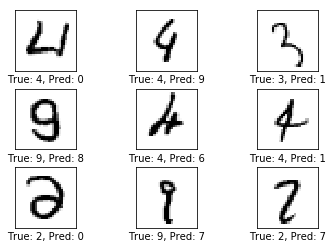

In [80]:
plot_example_errors(y_test, correct)